In [4]:
#upload file from computer to colab
from google.colab import files

In [10]:
uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date__20250413.csv to NYPD_Arrest_Data__Year_to_Date__20250413.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20250413.csv')

In [17]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,01/30/2024,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,03/30/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,04/06/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,04/18/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,05/22/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260498,298287970,12/20/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,90,0,25-44,M,WHITE HISPANIC,998044,198865,40.712514,-73.950245,POINT (-73.950245 40.712514)
260499,298401282,12/23/2024,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,M,24,0,45-64,M,WHITE HISPANIC,991558,226956,40.789615,-73.973609,POINT (-73.9736085726657 40.78961486176856)
260500,298622307,12/30/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,K,67,0,25-44,M,BLACK,1003422,178505,40.656611,-73.930902,POINT (-73.93090206546258 40.65661089034527)
260501,298335810,12/21/2024,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450501,F,Q,115,0,25-44,M,WHITE HISPANIC,1020035,213111,40.751545,-73.870843,POINT (-73.87084320922126 40.75154455706598)


In [19]:
print(df.columns)

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')


In [20]:
#remove rows with missing precinct or arrest date
df = df.dropna(subset=['ARREST_PRECINCT', 'ARREST_DATE'])

In [21]:
# want to compare number of crime in the summer vs the winter b/w
# two precincts. First will assign season to dates and select two precincts to compare.
#filter for precincts 75 and 18
df = df[df['ARREST_PRECINCT'].isin([75, 18])]

In [26]:
#pulling out the month from the date
df['MONTH'] = pd.to_datetime(df['ARREST_DATE']).dt.month

In [27]:
#adding season labels to months
df['SEASON'] = df['MONTH'].apply(lambda m: 'Winter' if m in [12, 1, 2, 3]
                                 else 'Summer' if m in [5, 6, 7, 8]
                                 else 'Other')

In [28]:
#filtering for only summer and winter seaons
df = df[df['SEASON'].isin(['Summer', 'Winter'])]

In [29]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MONTH,SEASON
4,287308954,2024-05-22,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,...,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313),5,Summer
13,288638726,2024-06-17,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,75,...,25-44,M,BLACK,1012412,182986,40.668896,-73.898482,POINT (-73.898482 40.668896),6,Summer
88,283553057,2024-03-11,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,75,...,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404),3,Winter
92,282324171,2024-02-16,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553501,F,M,18,...,25-44,M,WHITE HISPANIC,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539),2,Winter
94,283100221,2024-03-02,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,18,...,25-44,M,WHITE HISPANIC,989135,218534,40.766501,-73.982362,POINT (-73.982362 40.766501),3,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260374,298584961,2024-12-28,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,K,75,...,45-64,M,BLACK,1014245,178261,40.655911,-73.891896,POINT (-73.89189593588219 40.65591111695709),12,Winter
260430,298404171,2024-12-23,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,75,...,18-24,F,BLACK,1020127,176089,40.649939,-73.870708,POINT (-73.870708 40.649939),12,Winter
260440,298551671,2024-12-27,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1657300,F,M,18,...,18-24,M,BLACK,988495,216331,40.760463,-73.984675,POINT (-73.984675 40.760463),12,Winter
260485,298665380,2024-12-31,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,K,75,...,25-44,M,BLACK,1019699,188375,40.683652,-73.872186,POINT (-73.87218617994516 40.68365160339583),12,Winter


In [30]:
#counting the amount of arrest per season
counts = df.groupby(['ARREST_PRECINCT', 'SEASON']).size().unstack()

In [31]:
print(counts)

SEASON           Summer  Winter
ARREST_PRECINCT                
18                 2095    1580
75                 3024    2759


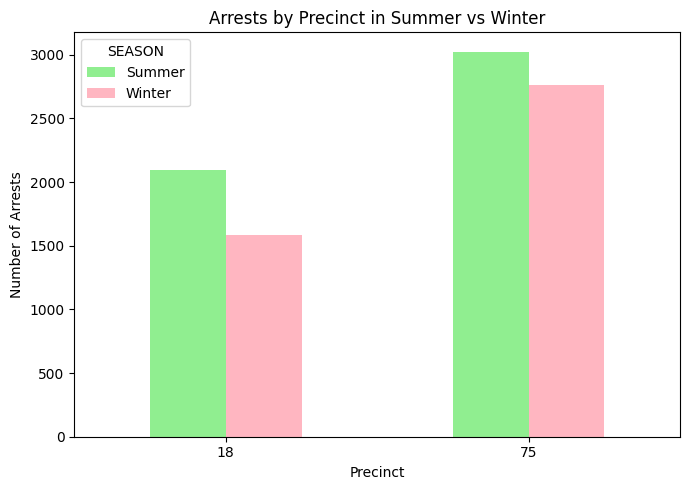

In [37]:
#bar graph visualizing counts
counts.plot(kind='bar', figsize=(7, 5), color=['lightgreen', 'lightpink'])
plt.title('Arrests by Precinct in Summer vs Winter')
plt.xlabel('Precinct')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
conclusion = """The data shows that arrests in both precincts increased during the summer months compared to winter.
This may be influenced by more public activity, events, or targeted policing during warmer months.
There could also be more police presence in East New York (Precinct 75) compared to Midtown (Precinct 18),
which may contribute to the difference in arrest numbers."""

In [8]:
print(conclusion)

The data shows that arrests in both precincts increased during the summer months compared to winter.
This may be influenced by more public activity, events, or targeted policing during warmer months.
There could also be more police presence in East New York (Precinct 75) compared to Midtown (Precinct 18), 
which may contribute to the difference in arrest numbers.
